In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

print('Success')

Success


# Use the iris database to answer the following quesitons:


In [2]:
from env import host, user, password
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

measurements = pd.read_sql("""select * from measurements""", get_db_url('iris_db'))
species = pd.read_sql("""select * from species""", get_db_url('iris_db'))

species

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


In [3]:
measurements

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


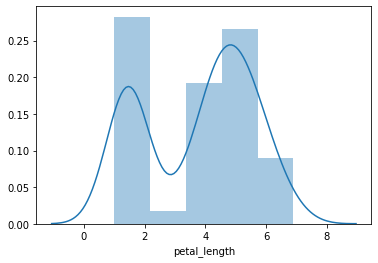

In [4]:
# What does the distribution of petal lengths look like?

sns.distplot(measurements.petal_length)

In [5]:
# Is there a correlation between petal length and petal width? - Yes
measurements['petal_width'].corr(measurements['petal_length'])

0.9628654314027961

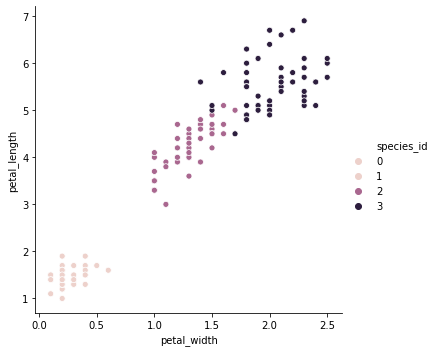

In [8]:
# test corraltion By visualizing

sns.relplot(x='petal_width', y='petal_length', hue='species_id', data=measurements)

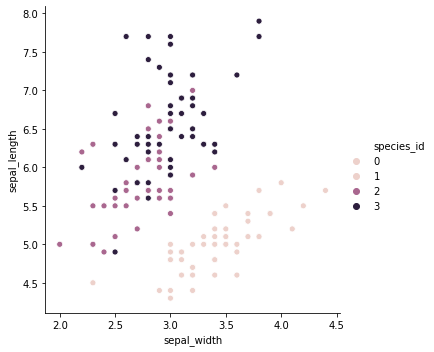

In [9]:
# Would it be reasonable to predict species based on sepal width and sepal length? - No

sns.relplot(x='sepal_width', y='sepal_length', hue='species_id', data=measurements)

The attribute with the highest corraltion to species is petal_width with a P score of 0.9565473328764034


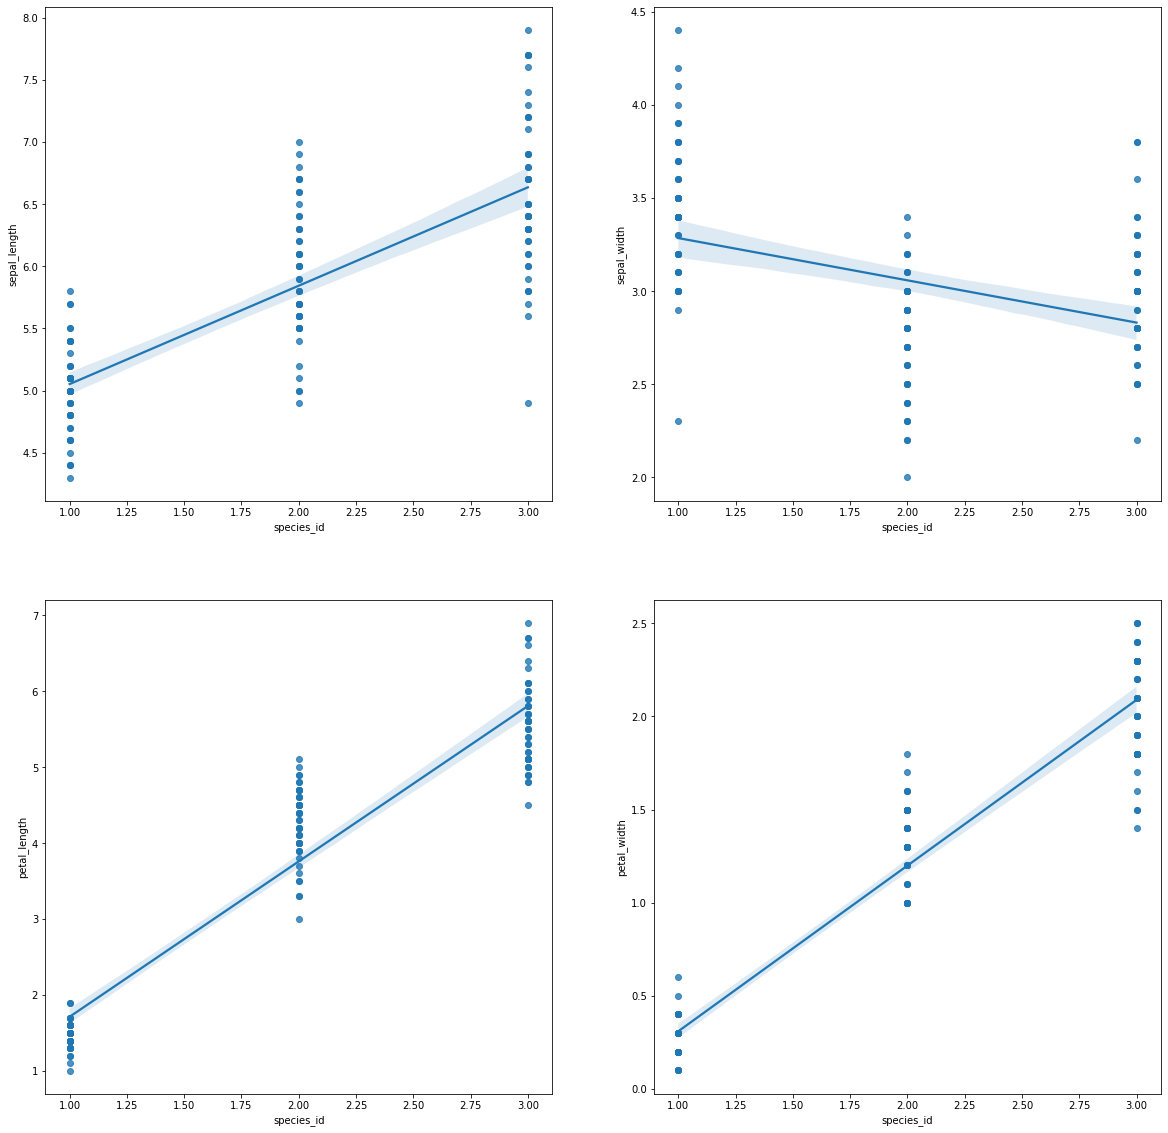

In [11]:
# Which features would be best used to predict species? - Petal width


plt.figure(figsize = (20,20))
plt.subplot(221)
sns.regplot(x='species_id', y='sepal_length', data=measurements)
plt.title('')

plt.subplot(222)
sns.regplot(x='species_id', y='sepal_width', data=measurements)


plt.subplot(223)
sns.regplot(x='species_id', y='petal_length', data=measurements)


plt.subplot(224)
sns.regplot(x='species_id', y='petal_width', data=measurements)
plt.show

print(f"The attribute with the highest corraltion to species is petal_width with a P score of {measurements['species_id'].corr(measurements['petal_width'])}")


## 2 Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 

In [12]:
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
# What do you notice? 

anscombe = sns.load_dataset('anscombe')
anscombe.groupby('dataset').describe()

# The count, mean, and std for x are all the same while y has the same mean and count

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

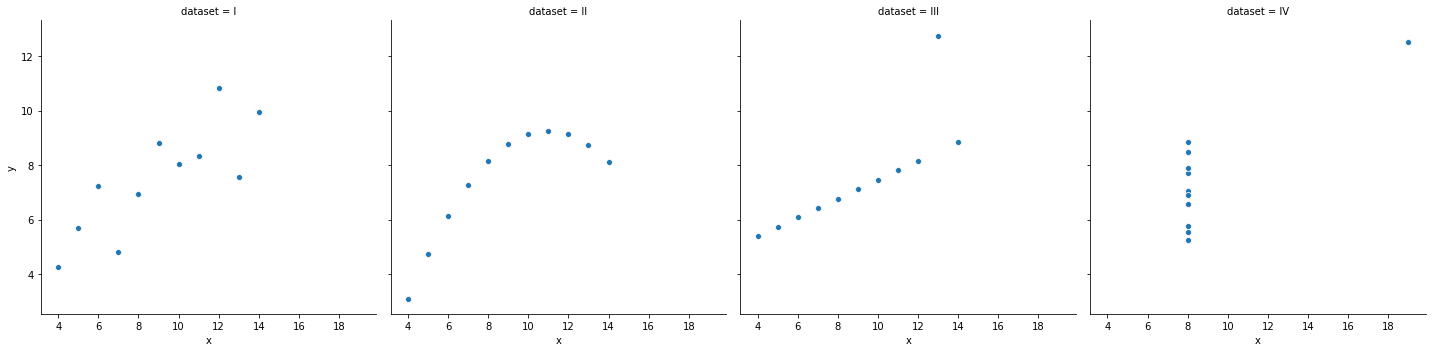

In [13]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

# use the col call function to plt each data set reults on a different plot
sns.relplot(x='x', y='y', col='dataset', data=anscombe)

## 3 Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.



In [24]:
from pydataset import data

spray = data('InsectSprays')
spray

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


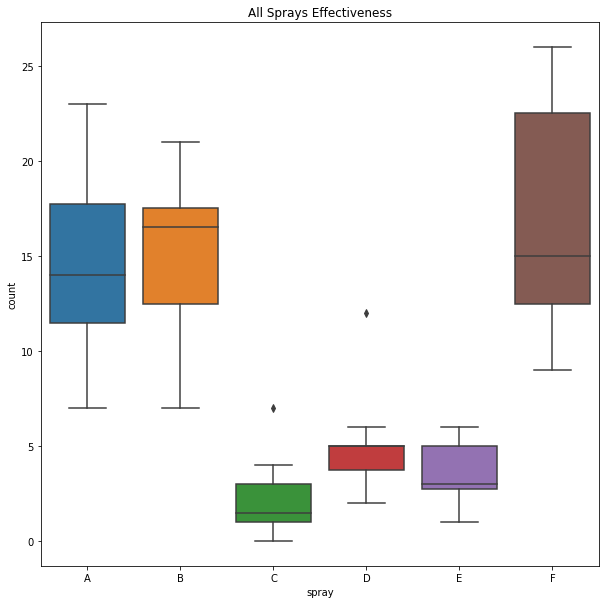

In [36]:
# Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows..
# the effectiveness of the different insect sprays.

plt.figure(figsize=(10, 10))
sns.boxplot(data=spray, x='spray', y='count')
plt.title("All Sprays Effectiveness")
plt.show()

In [49]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


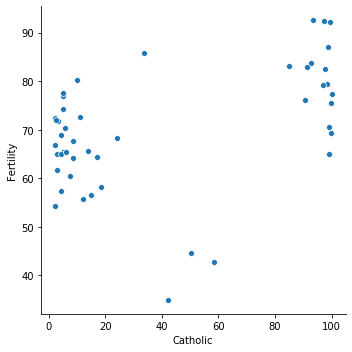

In [71]:
# Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

swiss = data('swiss')

# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
# (Choose a cutoff point for what constitutes catholic)
is_catholic = swiss['Catholic'] > 50

# Does whether or not a province is Catholic influence fertility? - Not directly. It might be a compounding aspect 
sns.relplot(x='Catholic', y='Fertility', data=swiss)

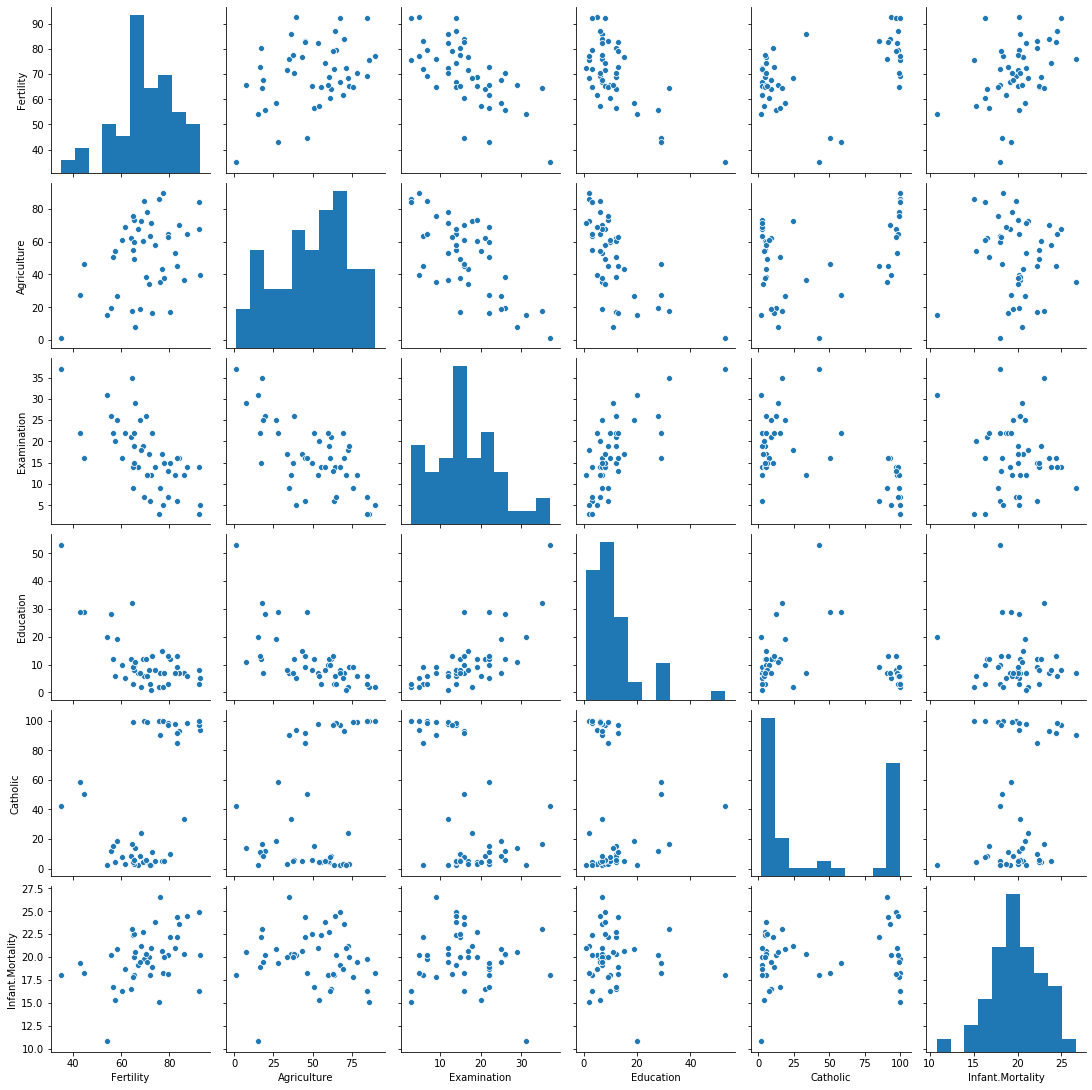

In [72]:
# What measure correlates most strongly with fertility? - Education is moderatly positively correlated
sns.pairplot(swiss)
swiss['Education'].corr(swiss['Fertility'])


In [172]:
# Using the chipotle dataset from the previous exercise, 

# import the data
    
chipotle = pd.read_sql("""SELECT * FROM orders""", get_db_url('chipotle'))
chipotle.head()


,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [173]:
chipotle['item_price'] = chipotle['item_price'].str.replace('$', "").astype(float)


top4_counts = chipotle.groupby('item_name')[['quantity', 'item_price']].sum().sort_values('quantity', ascending=False).head(4)
top4_counts

,quantity,item_price
item_name,,
Chicken Bowl,761,7342.73
Chicken Burrito,591,5575.82
Chips and Guacamole,506,2201.04
Steak Burrito,386,3851.43


Text(0, 0.5, 'Revenue ($)')

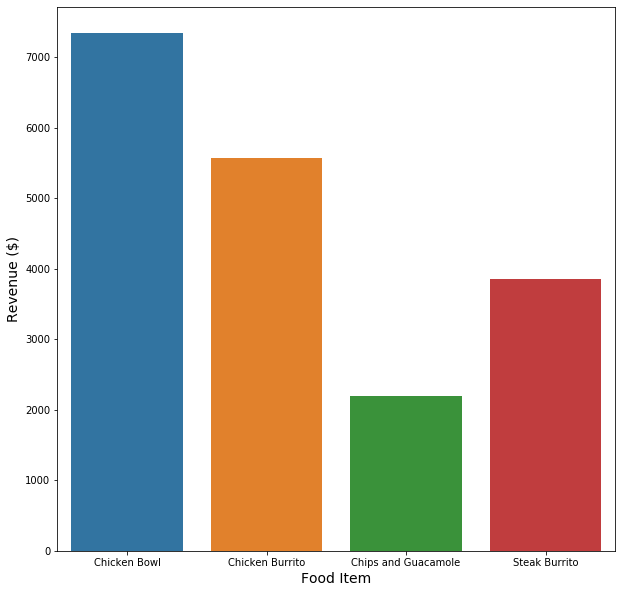

In [189]:
# top4_counts.reset_index(inplace=True)

plt.figure(figsize=(10,10))
sns.barplot(y='item_price', x=('item_name'), data=top4_counts)
plt.xlabel('Food Item', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)

In [195]:
# Load the sleepstudy data and read it's documentation. 
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


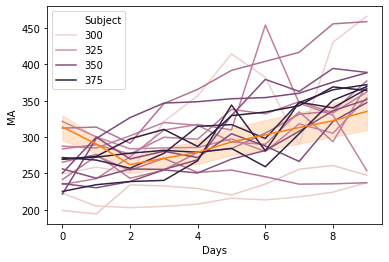

In [241]:
# Use seaborn to create a line chart of all the individual subject's reaction times and...
# a more prominant line showing the average change in reaction time.
sleep['MA'] = sleep['Reaction'].rolling(window=3).mean()

sns.lineplot(x='Days', y='Reaction', hue='Subject', data=sleep)
sns.lineplot(x='Days', y='MA', data=sleep)